Image loaded successfully
Image shape: (3770, 5306, 3)
Image type: uint8


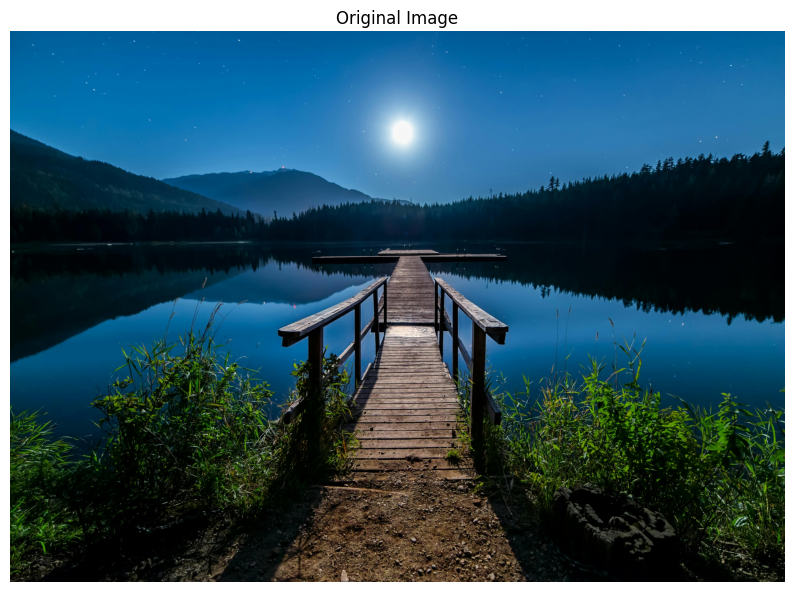

Image saved successfully as saved_image.jpg
Image dimensions: 5306x3770 pixels
Number of channels: 3
Image size: 60010860 pixels
Image data type: uint8
Maximum pixel value: 255
Minimum pixel value: 0


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def main():
    # Read an image
    # Replace 'image.jpg' with your image path
    image = cv2.imread('./image.png')
    
    # Check if image was successfully loaded
    if image is None:
        print('Error: Could not load image')
        return
    
    print('Image loaded successfully')
    print(f'Image shape: {image.shape}')
    print(f'Image type: {image.dtype}')
    
    # Display image using OpenCV
    cv2.imshow('Original Image', image)
    cv2.waitKey(0)  # Wait for any key press
    cv2.destroyAllWindows()
    
    # Display image using Matplotlib
    plt.figure(figsize=(10, 8))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
    plt.title('Original Image')
    plt.axis('off')
    plt.show()
    
    # Save the image
    cv2.imwrite('saved_image.jpg', image)
    print('Image saved successfully as saved_image.jpg')
    
    # Get image properties
    height, width = image.shape[:2]
    print(f'Image dimensions: {width}x{height} pixels')
    print(f'Number of channels: {image.shape[2]}')
    print(f'Image size: {image.size} pixels')
    print(f'Image data type: {image.dtype}')
    print(f'Maximum pixel value: {np.max(image)}')
    print(f'Minimum pixel value: {np.min(image)}')

if __name__ == "__main__":
    main()

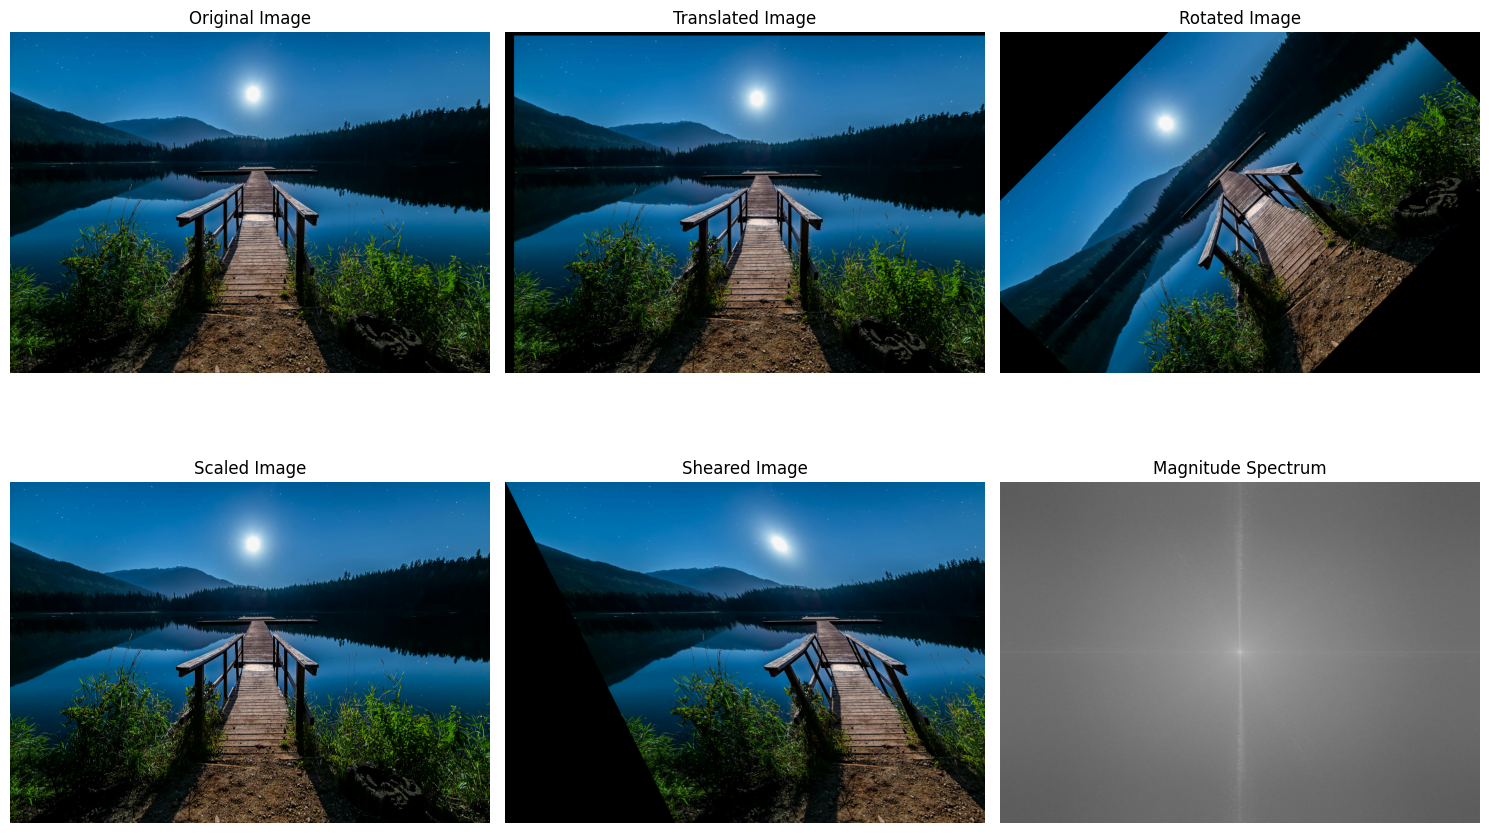

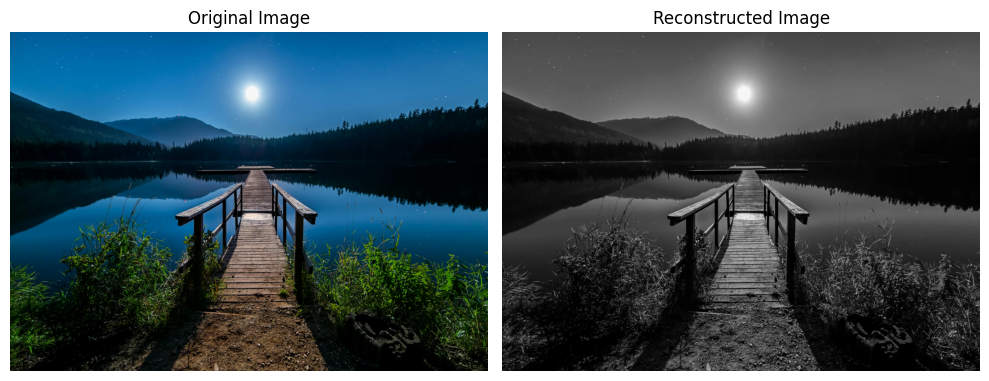

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_geometric_transformations(image):
    # Get image dimensions
    height, width = image.shape[:2]
    
    # 1. Translation
    translation_matrix = np.float32([[1, 0, 100], [0, 1, 50]])
    translated = cv2.warpAffine(image, translation_matrix, (width, height))
    
    # 2. Rotation
    center = (width//2, height//2)
    rotation_matrix = cv2.getRotationMatrix2D(center, 45, 1.0)
    rotated = cv2.warpAffine(image, rotation_matrix, (width, height))
    
    # 3. Scaling
    scaled = cv2.resize(image, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_LINEAR)
    
    # 4. Shearing
    shear_matrix = np.float32([[1, 0.5, 0], [0, 1, 0]])
    sheared = cv2.warpAffine(image, shear_matrix, (width, height))
    
    return translated, rotated, scaled, sheared

def apply_frequency_domain_operations(image):
    # Convert image to grayscale if it's not already
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image
    
    # Apply 2D DFT
    dft = cv2.dft(np.float32(gray), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    
    # Calculate magnitude spectrum
    magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))
    
    # Apply inverse DFT
    f_ishift = np.fft.ifftshift(dft_shift)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])
    
    return magnitude_spectrum, img_back

def main():
    # Read the image
    image = cv2.imread('./image.png')
    if image is None:
        print('Error: Could not load image')
        return
    
    # Apply geometric transformations
    translated, rotated, scaled, sheared = apply_geometric_transformations(image)
    
    # Apply frequency domain operations
    magnitude_spectrum, reconstructed = apply_frequency_domain_operations(image)
    
    # Display results
    plt.figure(figsize=(15, 10))
    
    # Original image
    plt.subplot(231)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')
    
    # Translated image
    plt.subplot(232)
    plt.imshow(cv2.cvtColor(translated, cv2.COLOR_BGR2RGB))
    plt.title('Translated Image')
    plt.axis('off')
    
    # Rotated image
    plt.subplot(233)
    plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
    plt.title('Rotated Image')
    plt.axis('off')
    
    # Scaled image
    plt.subplot(234)
    plt.imshow(cv2.cvtColor(scaled, cv2.COLOR_BGR2RGB))
    plt.title('Scaled Image')
    plt.axis('off')
    
    # Sheared image
    plt.subplot(235)
    plt.imshow(cv2.cvtColor(sheared, cv2.COLOR_BGR2RGB))
    plt.title('Sheared Image')
    plt.axis('off')
    
    # Magnitude spectrum
    plt.subplot(236)
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title('Magnitude Spectrum')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Display reconstructed image
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(122)
    plt.imshow(reconstructed, cmap='gray')
    plt.title('Reconstructed Image')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

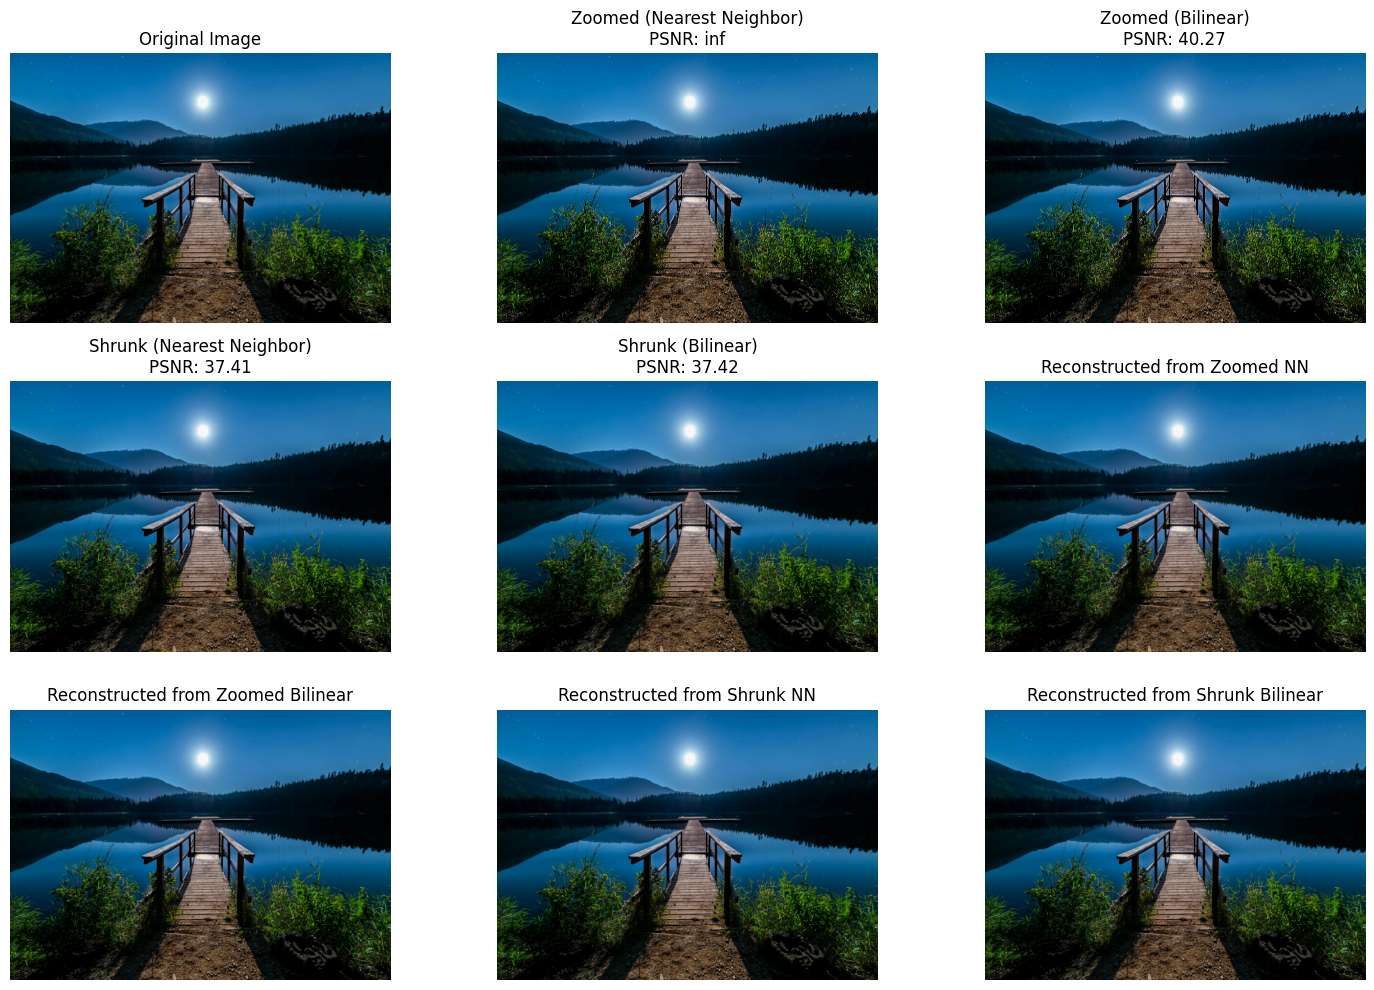


PSNR Values:
Zoomed (Nearest Neighbor): inf dB
Zoomed (Bilinear): 40.27 dB
Shrunk (Nearest Neighbor): 37.41 dB
Shrunk (Bilinear): 37.42 dB


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def zoom_shrink_comparison(image, zoom_factor=2.0, shrink_factor=0.5):
    """
    Compare different interpolation methods for zooming and shrinking
    """
    # Get original dimensions
    height, width = image.shape[:2]
    
    # Calculate new dimensions
    zoom_width = int(width * zoom_factor)
    zoom_height = int(height * zoom_factor)
    shrink_width = int(width * shrink_factor)
    shrink_height = int(height * shrink_factor)
    
    # Zoom using different interpolation methods
    zoomed_nn = cv2.resize(image, (zoom_width, zoom_height), 
                          interpolation=cv2.INTER_NEAREST)
    zoomed_bilinear = cv2.resize(image, (zoom_width, zoom_height), 
                                interpolation=cv2.INTER_LINEAR)
    
    # Shrink using different interpolation methods
    shrunk_nn = cv2.resize(image, (shrink_width, shrink_height), 
                          interpolation=cv2.INTER_NEAREST)
    shrunk_bilinear = cv2.resize(image, (shrink_width, shrink_height), 
                                interpolation=cv2.INTER_LINEAR)
    
    # Resize back to original size for comparison
    zoomed_nn_back = cv2.resize(zoomed_nn, (width, height), 
                              interpolation=cv2.INTER_NEAREST)
    zoomed_bilinear_back = cv2.resize(zoomed_bilinear, (width, height), 
                                    interpolation=cv2.INTER_NEAREST)
    shrunk_nn_back = cv2.resize(shrunk_nn, (width, height), 
                              interpolation=cv2.INTER_NEAREST)
    shrunk_bilinear_back = cv2.resize(shrunk_bilinear, (width, height), 
                                    interpolation=cv2.INTER_NEAREST)
    
    return (zoomed_nn, zoomed_bilinear, shrunk_nn, shrunk_bilinear,
            zoomed_nn_back, zoomed_bilinear_back, shrunk_nn_back, shrunk_bilinear_back)

def calculate_psnr(original, processed):
    """
    Calculate Peak Signal-to-Noise Ratio between original and processed images
    """
    mse = np.mean((original - processed) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

def main():
    # Read the image
    image = cv2.imread('./image.png')
    if image is None:
        print('Error: Could not load image')
        return
    
    # Convert to RGB for display
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Apply zooming and shrinking with different interpolation methods
    results = zoom_shrink_comparison(image)
    zoomed_nn, zoomed_bilinear, shrunk_nn, shrunk_bilinear, \
    zoomed_nn_back, zoomed_bilinear_back, shrunk_nn_back, shrunk_bilinear_back = results
    
    # Convert results to RGB for display
    zoomed_nn_rgb = cv2.cvtColor(zoomed_nn, cv2.COLOR_BGR2RGB)
    zoomed_bilinear_rgb = cv2.cvtColor(zoomed_bilinear, cv2.COLOR_BGR2RGB)
    shrunk_nn_rgb = cv2.cvtColor(shrunk_nn, cv2.COLOR_BGR2RGB)
    shrunk_bilinear_rgb = cv2.cvtColor(shrunk_bilinear, cv2.COLOR_BGR2RGB)
    
    # Calculate PSNR values
    psnr_zoomed_nn = calculate_psnr(image, zoomed_nn_back)
    psnr_zoomed_bilinear = calculate_psnr(image, zoomed_bilinear_back)
    psnr_shrunk_nn = calculate_psnr(image, shrunk_nn_back)
    psnr_shrunk_bilinear = calculate_psnr(image, shrunk_bilinear_back)
    
    # Display results
    plt.figure(figsize=(15, 10))
    
    # Original image
    plt.subplot(331)
    plt.imshow(image_rgb)
    plt.title('Original Image')
    plt.axis('off')
    
    # Zoomed images
    plt.subplot(332)
    plt.imshow(zoomed_nn_rgb)
    plt.title(f'Zoomed (Nearest Neighbor)\nPSNR: {psnr_zoomed_nn:.2f}')
    plt.axis('off')
    
    plt.subplot(333)
    plt.imshow(zoomed_bilinear_rgb)
    plt.title(f'Zoomed (Bilinear)\nPSNR: {psnr_zoomed_bilinear:.2f}')
    plt.axis('off')
    
    # Shrunk images
    plt.subplot(334)
    plt.imshow(shrunk_nn_rgb)
    plt.title(f'Shrunk (Nearest Neighbor)\nPSNR: {psnr_shrunk_nn:.2f}')
    plt.axis('off')
    
    plt.subplot(335)
    plt.imshow(shrunk_bilinear_rgb)
    plt.title(f'Shrunk (Bilinear)\nPSNR: {psnr_shrunk_bilinear:.2f}')
    plt.axis('off')
    
    # Reconstructed images
    plt.subplot(336)
    plt.imshow(cv2.cvtColor(zoomed_nn_back, cv2.COLOR_BGR2RGB))
    plt.title('Reconstructed from Zoomed NN')
    plt.axis('off')
    
    plt.subplot(337)
    plt.imshow(cv2.cvtColor(zoomed_bilinear_back, cv2.COLOR_BGR2RGB))
    plt.title('Reconstructed from Zoomed Bilinear')
    plt.axis('off')
    
    plt.subplot(338)
    plt.imshow(cv2.cvtColor(shrunk_nn_back, cv2.COLOR_BGR2RGB))
    plt.title('Reconstructed from Shrunk NN')
    plt.axis('off')
    
    plt.subplot(339)
    plt.imshow(cv2.cvtColor(shrunk_bilinear_back, cv2.COLOR_BGR2RGB))
    plt.title('Reconstructed from Shrunk Bilinear')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Print PSNR values
    print("\nPSNR Values:")
    print(f"Zoomed (Nearest Neighbor): {psnr_zoomed_nn:.2f} dB")
    print(f"Zoomed (Bilinear): {psnr_zoomed_bilinear:.2f} dB")
    print(f"Shrunk (Nearest Neighbor): {psnr_shrunk_nn:.2f} dB")
    print(f"Shrunk (Bilinear): {psnr_shrunk_bilinear:.2f} dB")

if __name__ == "__main__":
    main()

C:\Users\shail\AppData\Local\Temp\ipykernel_16864\3984204225.py:21: RuntimeWarning: overflow encountered in scalar add
  c = 255 / np.log(1 + np.max(gray))
C:\Users\shail\AppData\Local\Temp\ipykernel_16864\3984204225.py:21: RuntimeWarning: divide by zero encountered in log
  c = 255 / np.log(1 + np.max(gray))
C:\Users\shail\AppData\Local\Temp\ipykernel_16864\3984204225.py:22: RuntimeWarning: divide by zero encountered in log
  log_transformed = np.uint8(c * np.log(1 + gray))
C:\Users\shail\AppData\Local\Temp\ipykernel_16864\3984204225.py:22: RuntimeWarning: invalid value encountered in multiply
  log_transformed = np.uint8(c * np.log(1 + gray))
C:\Users\shail\AppData\Local\Temp\ipykernel_16864\3984204225.py:22: RuntimeWarning: invalid value encountered in cast
  log_transformed = np.uint8(c * np.log(1 + gray))


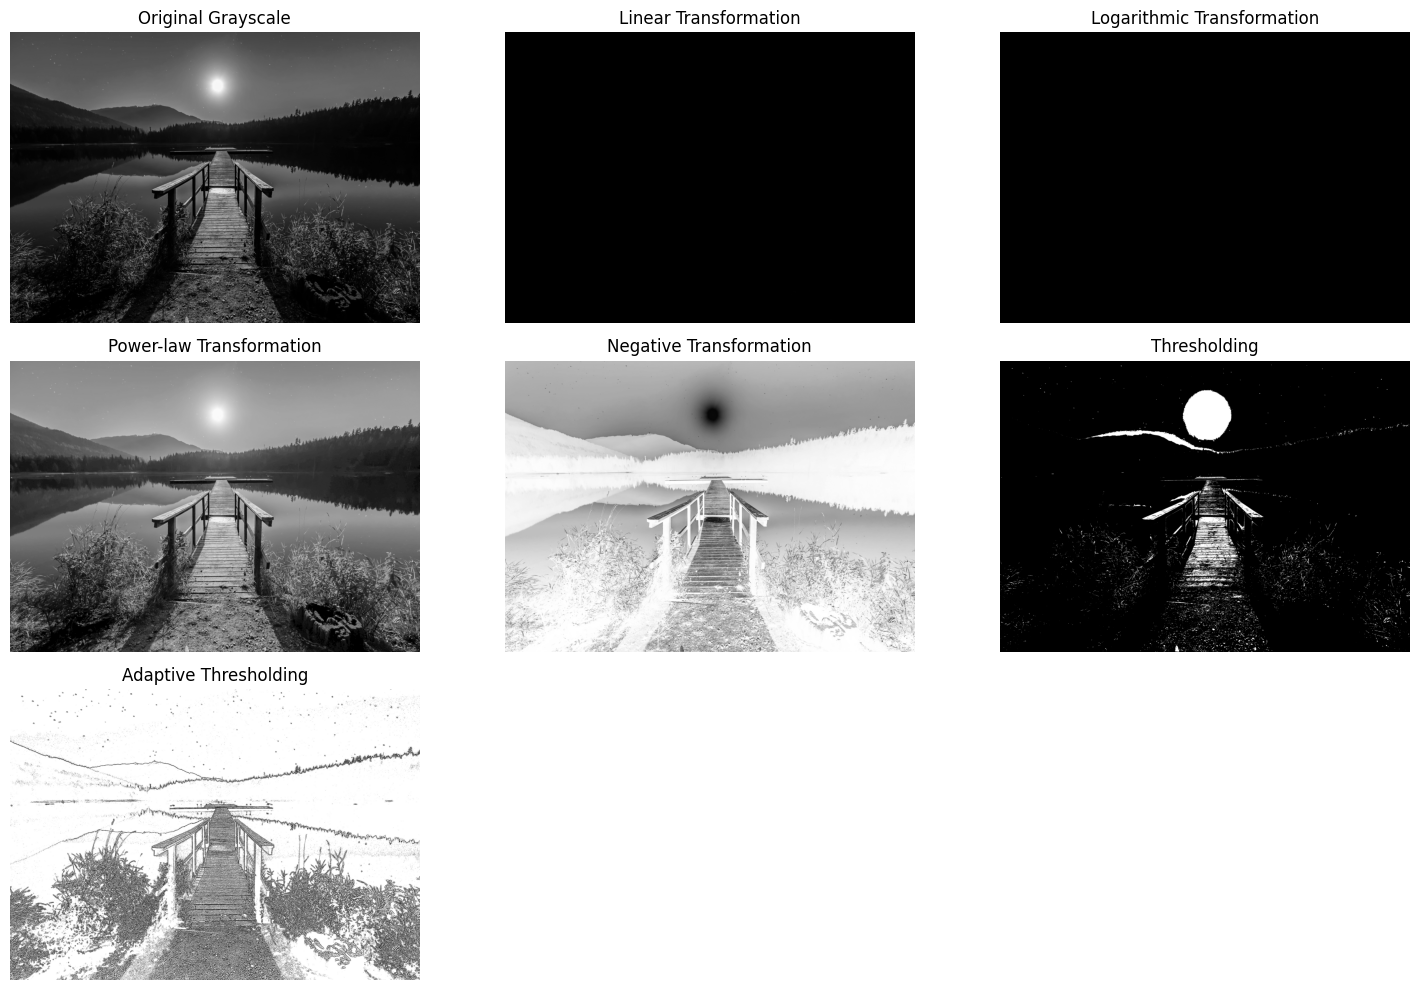

C:\Users\shail\AppData\Local\Temp\ipykernel_16864\3984204225.py:48: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img.ravel(), 256, [0, 256])


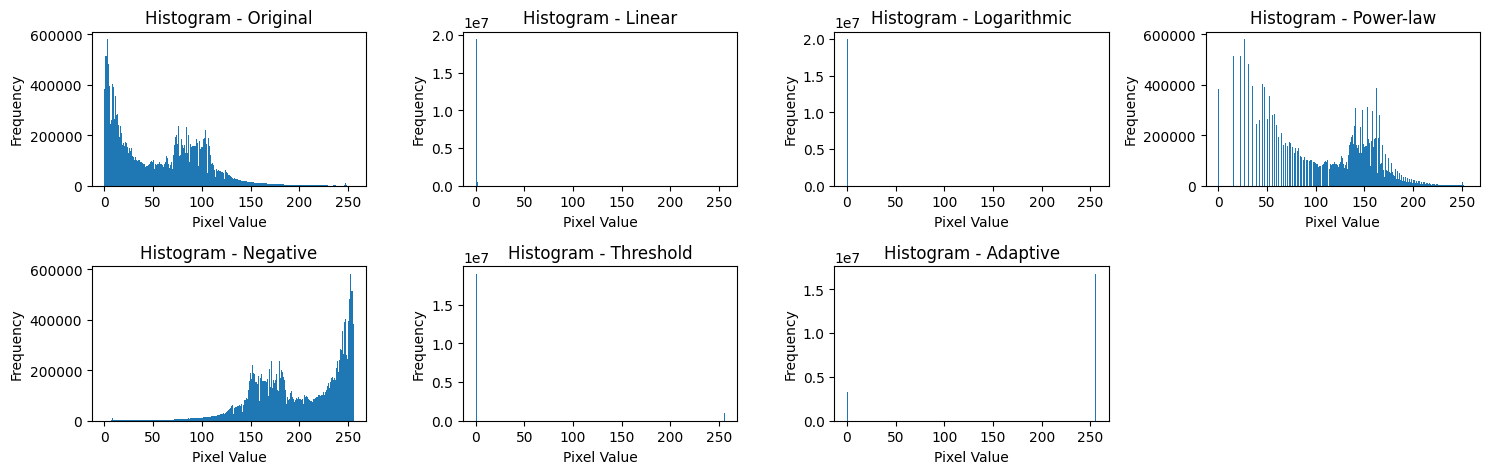


Image Statistics:

Original Image:
Mean: 55.25
Standard Deviation: 44.88
Min Value: 0
Max Value: 255

Linear Image:
Mean: 0.03
Standard Deviation: 0.16
Min Value: 0
Max Value: 1

Logarithmic Image:
Mean: 0.00
Standard Deviation: 0.00
Min Value: 0
Max Value: 0

Power-law Image:
Mean: 104.96
Standard Deviation: 54.40
Min Value: 0
Max Value: 255

Negative Image:
Mean: 199.75
Standard Deviation: 44.88
Min Value: 0
Max Value: 255

Threshold Image:
Mean: 12.74
Standard Deviation: 55.56
Min Value: 0
Max Value: 255

Adaptive Image:
Mean: 213.74
Standard Deviation: 93.91
Min Value: 0
Max Value: 255


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_gray_level_transformations(image):
    """
    Apply various gray-level transformations to the image
    """
    # Convert to grayscale if image is color
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image
    
    # 1. Linear Transformation (Contrast Stretching)
    min_val = np.min(gray)
    max_val = np.max(gray)
    linear_transformed = np.uint8(255 * (gray - min_val) / (max_val - min_val))
    
    # 2. Logarithmic Transformation
    c = 255 / np.log(1 + np.max(gray))
    log_transformed = np.uint8(c * np.log(1 + gray))
    
    # 3. Power-law (Gamma) Transformation
    gamma = 0.5  # gamma < 1 for darker image, gamma > 1 for brighter image
    power_transformed = np.uint8(255 * np.power(gray/255, gamma))
    
    # 4. Negative Transformation
    negative = 255 - gray
    
    # 5. Thresholding
    _, threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    
    # 6. Adaptive Thresholding
    adaptive_thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                          cv2.THRESH_BINARY, 11, 2)
    
    return (gray, linear_transformed, log_transformed, power_transformed,
            negative, threshold, adaptive_thresh)

def plot_histograms(images, titles):
    """
    Plot histograms for multiple images
    """
    plt.figure(figsize=(15, 5))
    for i, (img, title) in enumerate(zip(images, titles), 1):
        plt.subplot(2, 4, i)
        plt.hist(img.ravel(), 256, [0, 256])
        plt.title(f'Histogram - {title}')
        plt.xlabel('Pixel Value')
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

def main():
    # Read the image
    image = cv2.imread('./image.png')
    if image is None:
        print('Error: Could not load image')
        return
    
    # Apply transformations
    results = apply_gray_level_transformations(image)
    gray, linear, log, power, negative, threshold, adaptive = results
    
    # Convert results to RGB for display
    gray_rgb = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)
    linear_rgb = cv2.cvtColor(linear, cv2.COLOR_GRAY2RGB)
    log_rgb = cv2.cvtColor(log, cv2.COLOR_GRAY2RGB)
    power_rgb = cv2.cvtColor(power, cv2.COLOR_GRAY2RGB)
    negative_rgb = cv2.cvtColor(negative, cv2.COLOR_GRAY2RGB)
    threshold_rgb = cv2.cvtColor(threshold, cv2.COLOR_GRAY2RGB)
    adaptive_rgb = cv2.cvtColor(adaptive, cv2.COLOR_GRAY2RGB)
    
    # Display results
    plt.figure(figsize=(15, 10))
    
    # Original grayscale image
    plt.subplot(331)
    plt.imshow(gray_rgb, cmap='gray')
    plt.title('Original Grayscale')
    plt.axis('off')
    
    # Linear transformation
    plt.subplot(332)
    plt.imshow(linear_rgb, cmap='gray')
    plt.title('Linear Transformation')
    plt.axis('off')
    
    # Logarithmic transformation
    plt.subplot(333)
    plt.imshow(log_rgb, cmap='gray')
    plt.title('Logarithmic Transformation')
    plt.axis('off')
    
    # Power-law transformation
    plt.subplot(334)
    plt.imshow(power_rgb, cmap='gray')
    plt.title('Power-law Transformation')
    plt.axis('off')
    
    # Negative transformation
    plt.subplot(335)
    plt.imshow(negative_rgb, cmap='gray')
    plt.title('Negative Transformation')
    plt.axis('off')
    
    # Thresholding
    plt.subplot(336)
    plt.imshow(threshold_rgb, cmap='gray')
    plt.title('Thresholding')
    plt.axis('off')
    
    # Adaptive thresholding
    plt.subplot(337)
    plt.imshow(adaptive_rgb, cmap='gray')
    plt.title('Adaptive Thresholding')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Plot histograms
    plot_histograms(results, ['Original', 'Linear', 'Logarithmic', 'Power-law',
                             'Negative', 'Threshold', 'Adaptive'])
    
    # Calculate and display statistics
    print("\nImage Statistics:")
    for i, (img, title) in enumerate(zip(results, ['Original', 'Linear', 'Logarithmic', 'Power-law',
                                                  'Negative', 'Threshold', 'Adaptive'])):
        print(f"\n{title} Image:")
        print(f"Mean: {np.mean(img):.2f}")
        print(f"Standard Deviation: {np.std(img):.2f}")
        print(f"Min Value: {np.min(img)}")
        print(f"Max Value: {np.max(img)}")

if __name__ == "__main__":
    main()

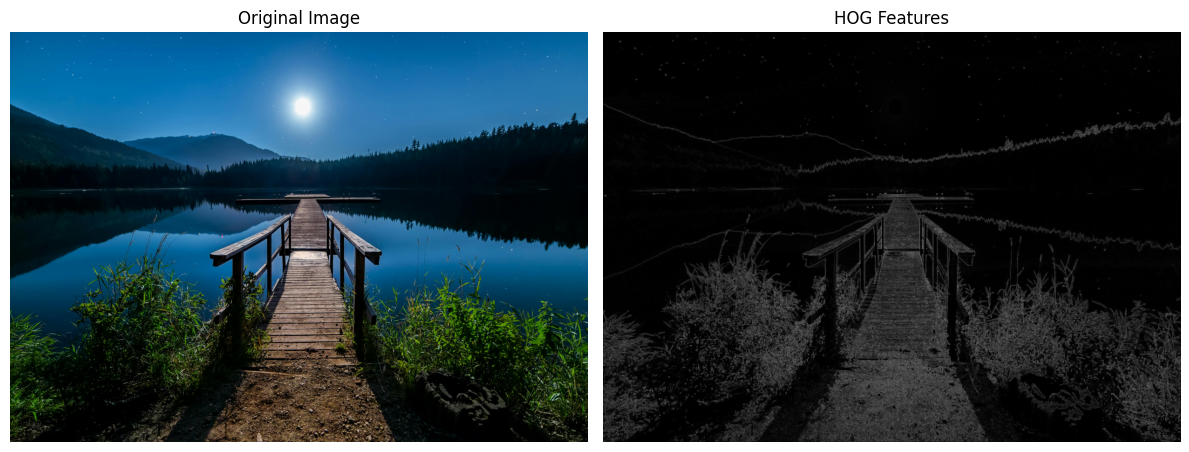


HOG Feature Analysis:
Total number of HOG features: 11201040
Feature vector shape: (11201040,)
Mean feature value: 0.0983
Standard deviation: 0.1316
Min feature value: 0.0000
Max feature value: 1.0000


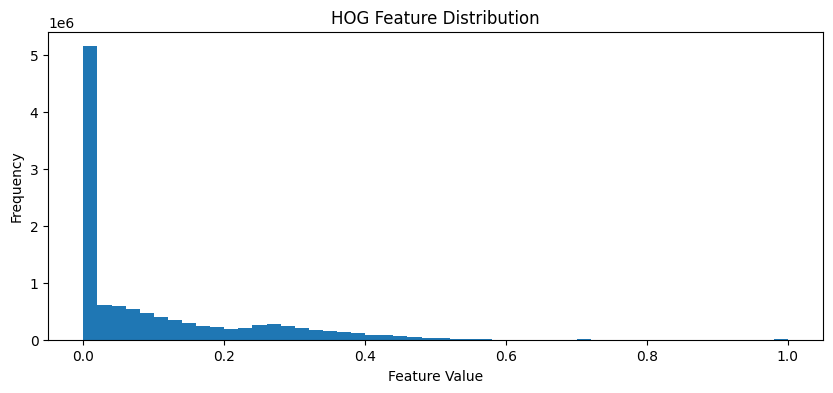


HOG features saved to 'hog_features.npy'
HOG visualization saved to 'hog_visualization.png'


In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure

def compute_hog_features(image):
    """
    Compute HOG features and their visualization
    """
    # Convert to grayscale if image is color
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image
    
    # Compute HOG features
    # Parameters:
    # - orientations: Number of orientation bins
    # - pixels_per_cell: Size of a cell
    # - cells_per_block: Number of cells in each block
    # - visualize: Whether to return HOG image
    # - feature_vector: Whether to return features as a 1D array
    hog_features, hog_image = hog(gray, 
                                 orientations=9,
                                 pixels_per_cell=(8, 8),
                                 cells_per_block=(2, 2),
                                 visualize=True,
                                 feature_vector=True)
    
    # Rescale histogram for better visualization
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
    
    return hog_features, hog_image_rescaled

def visualize_hog_features(image, hog_image):
    """
    Visualize original image and HOG features
    """
    # Convert original image to RGB for display
    if len(image.shape) == 3:
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    else:
        image_rgb = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    
    # Create figure with two subplots
    plt.figure(figsize=(12, 5))
    
    # Original image
    plt.subplot(121)
    plt.imshow(image_rgb)
    plt.title('Original Image')
    plt.axis('off')
    
    # HOG features
    plt.subplot(122)
    plt.imshow(hog_image, cmap='gray')
    plt.title('HOG Features')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

def analyze_hog_features(hog_features):
    """
    Analyze and print information about HOG features
    """
    print("\nHOG Feature Analysis:")
    print(f"Total number of HOG features: {len(hog_features)}")
    print(f"Feature vector shape: {hog_features.shape}")
    print(f"Mean feature value: {np.mean(hog_features):.4f}")
    print(f"Standard deviation: {np.std(hog_features):.4f}")
    print(f"Min feature value: {np.min(hog_features):.4f}")
    print(f"Max feature value: {np.max(hog_features):.4f}")
    
    # Plot HOG feature histogram
    plt.figure(figsize=(10, 4))
    plt.hist(hog_features, bins=50)
    plt.title('HOG Feature Distribution')
    plt.xlabel('Feature Value')
    plt.ylabel('Frequency')
    plt.show()

def main():
    # Read the image
    image = cv2.imread('./image.png')
    if image is None:
        print('Error: Could not load image')
        return
    
    # Compute HOG features
    hog_features, hog_image = compute_hog_features(image)
    
    # Visualize results
    visualize_hog_features(image, hog_image)
    
    # Analyze HOG features
    analyze_hog_features(hog_features)
    
    # Save HOG features to file
    np.save('hog_features.npy', hog_features)
    print("\nHOG features saved to 'hog_features.npy'")
    
    # Optional: Save HOG visualization
    cv2.imwrite('hog_visualization.png', (hog_image * 255).astype(np.uint8))
    print("HOG visualization saved to 'hog_visualization.png'")

if __name__ == "__main__":
    main()

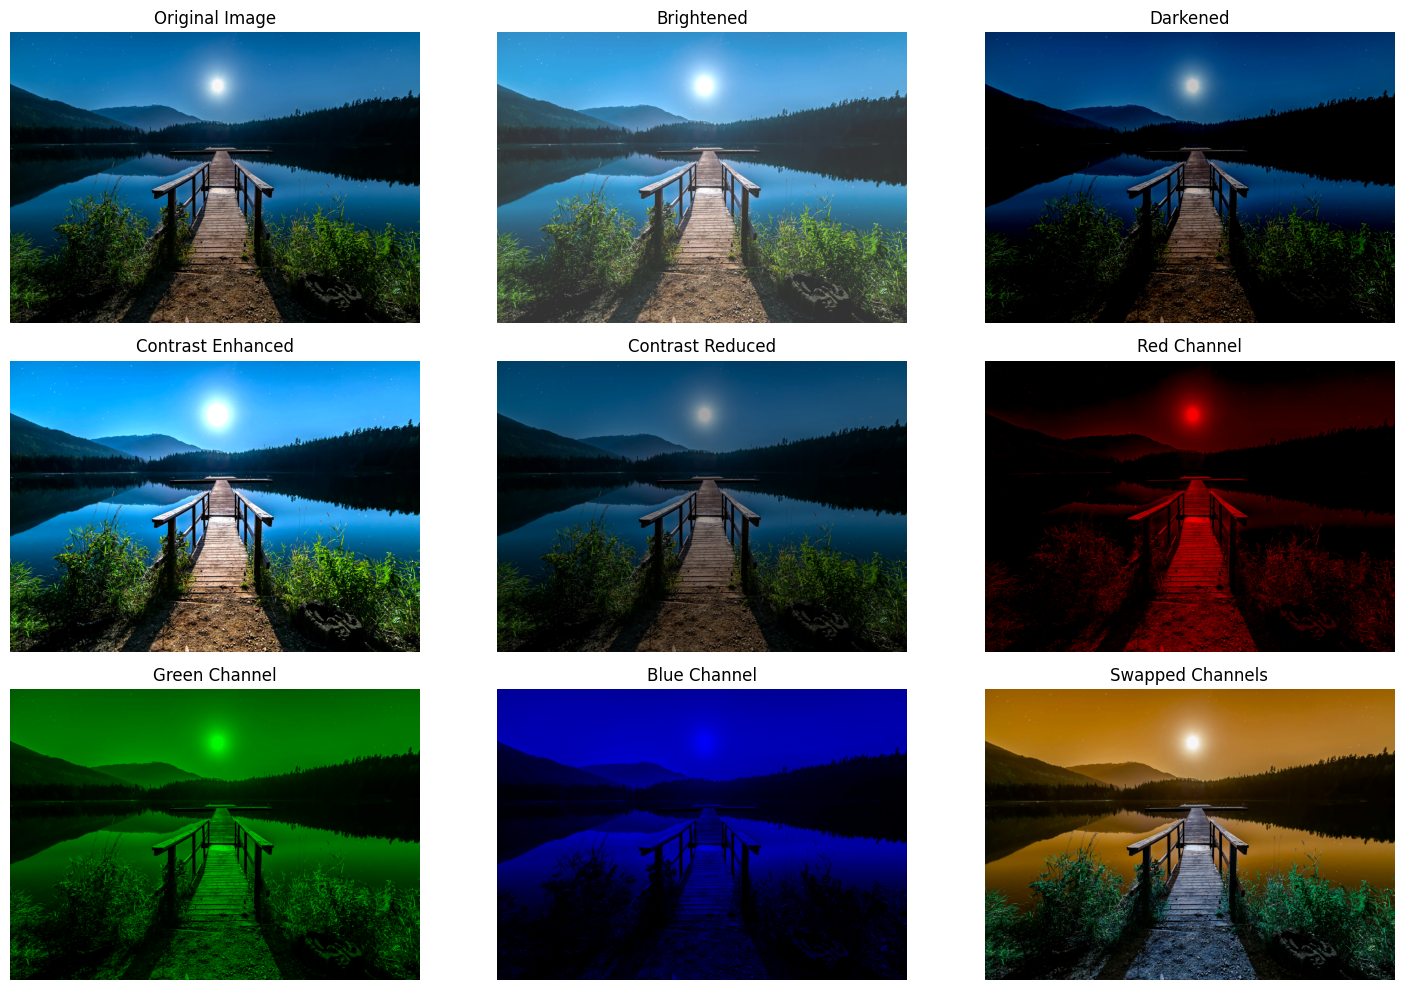

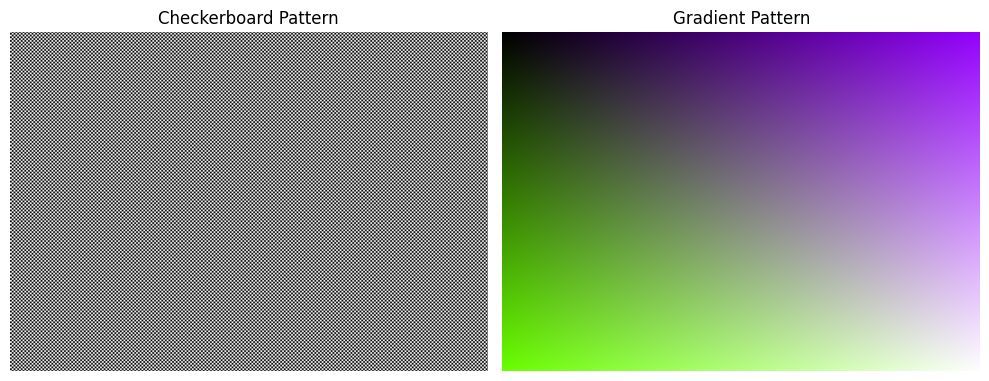


Image Statistics:
Original image shape: (3770, 5306, 3)
Original image dtype: uint8
Original image min value: 0
Original image max value: 255
Original image mean value: 57.61


In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def perform_pixel_operations(image):
    """
    Perform various arithmetic operations on pixels
    """
    # Create a copy of the image for operations
    img = image.copy()
    
    # 1. Addition (brightening)
    brightened = cv2.add(img, 50)  # Add 50 to each pixel value
    
    # 2. Subtraction (darkening)
    darkened = cv2.subtract(img, 50)  # Subtract 50 from each pixel value
    
    # 3. Multiplication (contrast enhancement)
    contrast = cv2.multiply(img, 1.5)  # Multiply each pixel by 1.5
    
    # 4. Division (contrast reduction)
    reduced = cv2.divide(img, 1.5)  # Divide each pixel by 1.5
    
    return brightened, darkened, contrast, reduced

def manipulate_color_channels(image):
    """
    Split and manipulate color channels
    """
    # Split channels
    b, g, r = cv2.split(image)
    
    # Create different channel combinations
    # 1. Red channel only
    red_channel = cv2.merge([np.zeros_like(b), np.zeros_like(g), r])
    
    # 2. Green channel only
    green_channel = cv2.merge([np.zeros_like(b), g, np.zeros_like(r)])
    
    # 3. Blue channel only
    blue_channel = cv2.merge([b, np.zeros_like(g), np.zeros_like(r)])
    
    # 4. Swap red and blue channels
    swapped = cv2.merge([r, g, b])
    
    return red_channel, green_channel, blue_channel, swapped

def manipulate_individual_pixels(image):
    """
    Manipulate individual pixels in the image
    """
    # Create a copy of the image
    img = image.copy()
    
    # Get image dimensions
    height, width = img.shape[:2]
    
    # 1. Create a checkerboard pattern
    for i in range(0, height, 20):
        for j in range(0, width, 20):
            if (i + j) % 40 == 0:
                img[i:i+20, j:j+20] = [255, 255, 255]  # White
            else:
                img[i:i+20, j:j+20] = [0, 0, 0]  # Black
    
    # 2. Create a gradient pattern
    gradient = np.zeros_like(image)
    for i in range(height):
        for j in range(width):
            gradient[i, j] = [int(255 * j/width), int(255 * i/height), int(255 * (i+j)/(height+width))]
    
    return img, gradient

def main():
    # Read the image
    image = cv2.imread('./image.png')
    if image is None:
        print('Error: Could not load image')
        return
    
    # Convert to RGB for display
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Perform pixel operations
    brightened, darkened, contrast, reduced = perform_pixel_operations(image)
    
    # Manipulate color channels
    red_channel, green_channel, blue_channel, swapped = manipulate_color_channels(image)
    
    # Manipulate individual pixels
    checkerboard, gradient = manipulate_individual_pixels(image)
    
    # Convert all results to RGB for display
    brightened_rgb = cv2.cvtColor(brightened, cv2.COLOR_BGR2RGB)
    darkened_rgb = cv2.cvtColor(darkened, cv2.COLOR_BGR2RGB)
    contrast_rgb = cv2.cvtColor(contrast, cv2.COLOR_BGR2RGB)
    reduced_rgb = cv2.cvtColor(reduced, cv2.COLOR_BGR2RGB)
    red_rgb = cv2.cvtColor(red_channel, cv2.COLOR_BGR2RGB)
    green_rgb = cv2.cvtColor(green_channel, cv2.COLOR_BGR2RGB)
    blue_rgb = cv2.cvtColor(blue_channel, cv2.COLOR_BGR2RGB)
    swapped_rgb = cv2.cvtColor(swapped, cv2.COLOR_BGR2RGB)
    checkerboard_rgb = cv2.cvtColor(checkerboard, cv2.COLOR_BGR2RGB)
    gradient_rgb = cv2.cvtColor(gradient, cv2.COLOR_BGR2RGB)
    
    # Display results
    plt.figure(figsize=(15, 10))
    
    # Original image
    plt.subplot(331)
    plt.imshow(image_rgb)
    plt.title('Original Image')
    plt.axis('off')
    
    # Pixel operations
    plt.subplot(332)
    plt.imshow(brightened_rgb)
    plt.title('Brightened')
    plt.axis('off')
    
    plt.subplot(333)
    plt.imshow(darkened_rgb)
    plt.title('Darkened')
    plt.axis('off')
    
    plt.subplot(334)
    plt.imshow(contrast_rgb)
    plt.title('Contrast Enhanced')
    plt.axis('off')
    
    plt.subplot(335)
    plt.imshow(reduced_rgb)
    plt.title('Contrast Reduced')
    plt.axis('off')
    
    # Color channels
    plt.subplot(336)
    plt.imshow(red_rgb)
    plt.title('Red Channel')
    plt.axis('off')
    
    plt.subplot(337)
    plt.imshow(green_rgb)
    plt.title('Green Channel')
    plt.axis('off')
    
    plt.subplot(338)
    plt.imshow(blue_rgb)
    plt.title('Blue Channel')
    plt.axis('off')
    
    plt.subplot(339)
    plt.imshow(swapped_rgb)
    plt.title('Swapped Channels')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Display pixel manipulation results
    plt.figure(figsize=(10, 5))
    
    plt.subplot(121)
    plt.imshow(checkerboard_rgb)
    plt.title('Checkerboard Pattern')
    plt.axis('off')
    
    plt.subplot(122)
    plt.imshow(gradient_rgb)
    plt.title('Gradient Pattern')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Print image statistics
    print("\nImage Statistics:")
    print(f"Original image shape: {image.shape}")
    print(f"Original image dtype: {image.dtype}")
    print(f"Original image min value: {np.min(image)}")
    print(f"Original image max value: {np.max(image)}")
    print(f"Original image mean value: {np.mean(image):.2f}")

if __name__ == "__main__":
    main()